# FEATURE REDUCED DATA SET: 
### Preprocessing a drastically reduced data set for modeling

## Sections:
- <a href="#overview">1. Overview of Dataset</a><br>
- <a href="#missing">2. Missing Values & Imputation</a><br>
- <a href="#feature">3. Feature Engineering</a><br>
- <a href="#final">4. Minimizing & Finalizing Feature Space</a><br>

### Initializing:

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
pd.set_option("display.max_columns", 101)

- - -
<br>

<p><a name="overview"></a></p>
## 1. Overview of Dataset

### Load Datasets: 

In [2]:
# Load train dataset
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [3]:
# Check for duplicated values
print('Duplicated train values:', df_train.duplicated().sum())
print('Duplicated test values:', df_test.duplicated().sum())

Duplicated train values: 0
Duplicated test values: 0


### Merge training and test Datasets for Processing:

In [4]:
df_train_id = df_train['id']
df_test_id = df_test['id']

In [5]:
# Drop ID Column
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [6]:
# Create a set variable to differnetiate between train and test
df_train['section'] = "Train"
df_test['section'] = "Test"

In [7]:
# Create a Sale Price column for df_test and set to 0 as a placeholder
df_test['price'] = 0

In [8]:
# Stack the datasets
df = pd.concat([df_train, df_test], ignore_index=True, axis = 0, sort = False)

- - -
<br>

<p><a name="missing"></a></p>
## 2. Missing Values & Imputation

Text(0.5, 1.0, 'Missing Values by Feature')

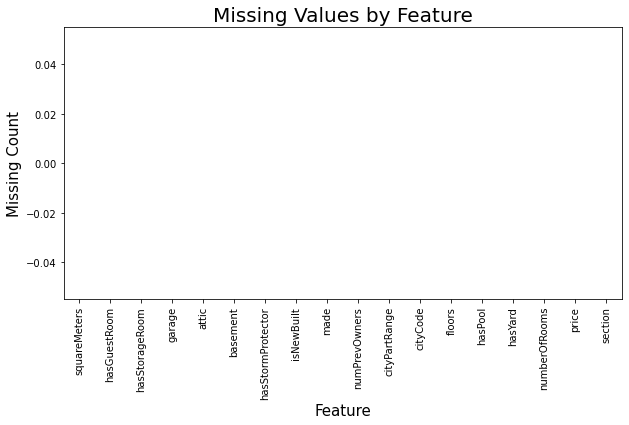

In [9]:
# Check for Columns with NA values
missing = df.isnull().sum()

# Vizualize missing value count
missing = missing[missing >= 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (10,5))
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Missing Count',fontsize = 15)
plt.title('Missing Values by Feature', fontsize=20)

In [11]:
# Check Number of missing numerically
print(missing)

df[df['price'] == 0].shape

squareMeters         0
hasGuestRoom         0
hasStorageRoom       0
garage               0
attic                0
basement             0
hasStormProtector    0
isNewBuilt           0
made                 0
numPrevOwners        0
cityPartRange        0
cityCode             0
floors               0
hasPool              0
hasYard              0
numberOfRooms        0
price                0
section              0
dtype: int64


(15154, 18)

### Check Missingness

In [27]:
missing = df.isnull().sum()
missing = missing[missing > 0]
print('Missing Values:',missing.sum())

Missing Values: 0


In [12]:
df.shape

(37884, 18)

### Dummify and Re-split Data for Modeling:

In [13]:
# Dummifying the remaining nominal categorical variables: 
df = pd.get_dummies(df,drop_first=True)

# Sanity check:
df.shape

(37884, 18)

In [14]:
# Splitting the combined data set back to their train and test sets: 
train = df[df['section_Train'] == 1].drop(columns=['section_Train'])
test  = df[df['section_Train'] == 0].drop(columns=['section_Train'])

# Sanity check:
train.shape

(22730, 17)

In [15]:
# Sanity check:
test.shape

(15154, 17)

### Define and Prep training  and test sets:

In [16]:
# Creating training feature set and training dependent set:
X = train.drop(columns=['price'])
y = train['price']

In [21]:
# Sanity check:
X.shape

(22730, 16)

In [18]:
# Creating test test by dropping 'placeholder' variable added above:
XPredict = test.drop(columns=['price'])

# Sanity check:
XPredict.shape

(15154, 16)

### Printing .csv(s) for modeling:

In [19]:
X.to_csv('./data/xtrain_red.csv')
y.to_csv('./data/ytrain_red.csv')
XPredict.to_csv('./data/xtest_red.csv')
df_test_id.to_csv('./data/testID.csv')

- - -
<br>